<a href="https://colab.research.google.com/github/DS-1090/Indian_Pattern_Classifier/blob/main/Custom%2BRestnet%2BEfficientNet_IndianPattern_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading Dataset

In [1]:
pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: div456
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/div456/indian-fabrics-3-classes


100%|██████████| 88.4M/88.4M [00:04<00:00, 18.8MB/s]


Importing Libraries


In [3]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization


Creating Train, Valid, Test Datasets


In [4]:
import pathlib

data_dir = pathlib.Path('/content/indian-fabrics-3-classes/train')

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 1068 files belonging to 3 classes.


In [6]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/valid')
valid_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 71 files belonging to 3 classes.


In [7]:
data_dir = pathlib.Path('/content/indian-fabrics-3-classes/test')
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(320, 320),
  batch_size=64,
  color_mode='rgb',
  labels='inferred',
  label_mode='int'
  )


Found 49 files belonging to 3 classes.


In [8]:
batch_size = 64
img_height = 320
img_width = 320


Create & Train the model

In [9]:
model = Sequential()

In [10]:
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# model.add(layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)))
# model.add(layers.RandomRotation(0.1, fill_mode='nearest'))
# model.add(layers.RandomZoom(0.1))
# model.add(layers.RandomContrast(0.1))
# model.add(layers.RandomBrightness(0.04))

In [11]:

# model.add(Conv2D(64, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(128, 3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'],
              run_eagerly=True
               )


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 320, 320, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 320, 320, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 160, 160, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 160, 160, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       6,553,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,561,363 (25.03 MB)

 Trainable params: 6,561,363 (25.03 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
type(model)

keras.src.models.sequential.Sequential

In [15]:
h = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=10,
  batch_size= 32
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.3672 - loss: 2.0477 - val_accuracy: 0.5070 - val_loss: 1.0305
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 319ms/step - accuracy: 0.4866 - loss: 1.0048 - val_accuracy: 0.5352 - val_loss: 0.9383
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.7047 - loss: 0.7582 - val_accuracy: 0.7465 - val_loss: 0.7343
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - accuracy: 0.8688 - loss: 0.3818 - val_accuracy: 0.7887 - val_loss: 0.6760
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.9716 - loss: 0.1526 - val_accuracy: 0.7324 - val_loss: 0.8616
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.9808 - loss: 0.0995 - val_accuracy: 0.8169 - val_loss: 0.7840
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.9971 - loss: 0.0405 - val_accuracy: 0.8028 - val_loss: 0.7906
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.9922 - loss: 0.0271 - val_accurac

In [16]:
h.history

{'accuracy': [0.39513108134269714,
  0.5327715277671814,
  0.7631086111068726,
  0.8979400992393494,
  0.9737827777862549,
  0.9850187301635742,
  0.9953183531761169,
  0.9962546825408936,
  0.9990636706352234,
  0.9962546825408936],
 'loss': [1.6035081148147583,
  0.9642927050590515,
  0.6796213984489441,
  0.32095521688461304,
  0.13367703557014465,
  0.07607259601354599,
  0.035747867077589035,
  0.021878868341445923,
  0.015241333283483982,
  0.01919715851545334],
 'val_accuracy': [0.5070422291755676,
  0.5352112650871277,
  0.7464788556098938,
  0.7887324094772339,
  0.7323943376541138,
  0.8169013857841492,
  0.8028169274330139,
  0.7887324094772339,
  0.7887324094772339,
  0.8028169274330139],
 'val_loss': [1.0305315256118774,
  0.9383043050765991,
  0.7342873215675354,
  0.6760008931159973,
  0.8615845441818237,
  0.7839680910110474,
  0.7905567288398743,
  0.7439960241317749,
  0.7892322540283203,
  0.8026935458183289]}

In [17]:
model.save('/content/Pattern_model.h5')
model.save('/content/Pattern_model.keras')



Text(0.5, 1.0, 'Accuracy vs Epochs')

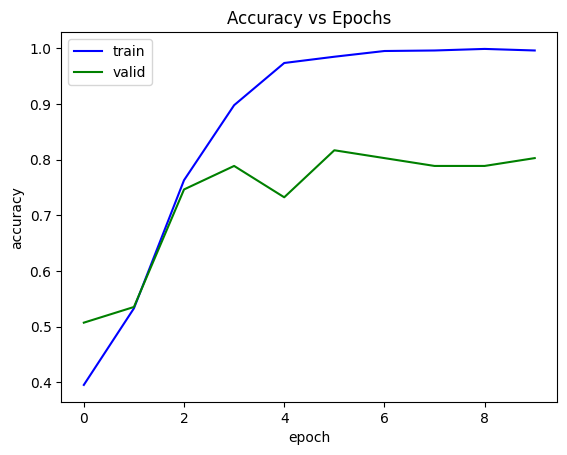

In [18]:
import matplotlib.pyplot as mp

mp.plot(h.history['accuracy'], color='blue')
mp.plot(h.history['val_accuracy'], color='green')
mp.xlabel('epoch')
mp.ylabel('accuracy')
mp.legend(['train', 'valid'])
mp.title('Accuracy vs Epochs')

Text(0.5, 1.0, 'Loss vs Epochs')

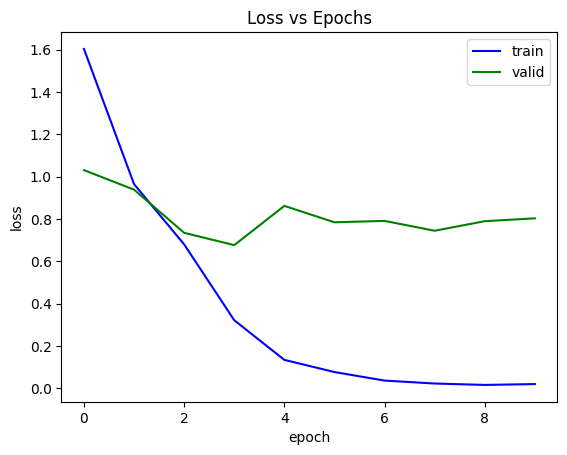

In [19]:
import matplotlib.pyplot as mp

mp.plot(h.history['loss'], color='blue')
mp.plot(h.history['val_loss'], color='green')
mp.xlabel('epoch')
mp.ylabel('loss')
mp.legend(['train', 'valid'])
mp.title('Loss vs Epochs')

Test the Model

In [20]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step - accuracy: 0.7347 - loss: 1.0022
Test Accuracy: 0.73
Test Loss: 1.00


In [21]:
import numpy as np

In [22]:
for images, labels in test_ds:
    predictions = model.predict(images)
    for i in range(len(images)):
        image_path = test_ds.file_paths[i]  # Assuming test_ds contains file paths
        index_pred = np.argmax(predictions[i])
        class_names = ['Banarasi', 'Ikat', 'Pichwai']
        predicted_class = class_names[index_pred]
        print("Image Path:", image_path)
        print("Predicted class:", predicted_class)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images13_jpg.rf.f2a3b1720972de4bb75b7fcb062269c8.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/images33_jpg.rf.b224fd1647ca405f955e199d2b136f2b.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Ikat/images33_jpg.rf.9e6ae9d131373c18cdbe6273089867f6.jpg
Predicted class: Banarasi
Image Path: /content/indian-fabrics-3-classes/test/Pichwai/pastel-hand-painted-pure-moonga-silk-pichwai-blouse-fabric-1-mtr-714991_jpg.rf.11185ddc8f105f1a385559cb725f5cc7.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/red-traditonal-banarasi-silk-brocade-fabric-2018415488-kfz42azv_jpg.rf.db3ab1c289bebaecbcff8767f5644a8c.jpg
Predicted class: Pichwai
Image Path: /content/indian-fabrics-3-classes/test/Banarasi/FKACJRD10028_2_1200x_jpg.rf.b6a9cf3e00dfa401ad208adce5ffac55.jpg
Predicted class: Pichwai
Image

In [23]:
from tensorflow.keras.preprocessing import image


In [25]:
img = image.load_img('/content/indian-fabrics-3-classes/test/Banarasi/sf40595-saroj-fabrics-purple-banarasi-fabric_jpg.rf.e25e831e8fc6c846a2ab5e8ef24bd165.jpg', target_size=(320, 320))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)
img_array /= 255.0
a= model.predict(img_array)
pred_class_ind = np.argmax(a)
print(a)
print(class_names[pred_class_ind])



(1, 320, 320, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.9235479  0.07065909 0.005793  ]]
Banarasi


In [26]:
class_names = test_ds.class_names
print("Class Names:", class_names)


Class Names: ['Banarasi', 'Ikat', 'Pichwai']


Using ResNet


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

data_dir = '/content/indian-fabrics-3-classes'

img_height, img_width = 224, 224
batch_size = 32

train_ds = image_dataset_from_directory(
    directory=f"{data_dir}/train",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

valid_ds = image_dataset_from_directory(
    directory=f"{data_dir}/valid",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    directory=f"{data_dir}/test",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = ResNet50(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')

base_model.trainable = False


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=15,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.2f}")

model.save('/content/fabric_classifier_resnet50.h5')


Found 1068 files belonging to 3 classes.
Found 71 files belonging to 3 classes.
Found 49 files belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 634ms/step - accuracy: 0.3728 - loss: 1.2622 - val_accuracy: 0.4930 - val_loss: 1.0588
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.3941 - loss: 1.0728 - val_accuracy: 0.4930 - val_loss: 1.0393
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.4229 - loss: 1.0594 - val_accuracy: 0.5070 - val_loss: 1.0381
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.4335 - loss: 1.0398 - val_accuracy: 0.5070 - val_loss: 1.0494
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.4189 - loss: 1.0411 - val_accuracy: 0.5070 - val_loss: 1.0302
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.4396 - loss: 1.0222 - val_accuracy: 0.5070 - val_loss: 1.0239
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accura

Test Accuracy: 0.43


In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

data_dir = '/content/indian-fabrics-3-classes'

img_height, img_width = 320, 320
batch_size = 32

train_ds = image_dataset_from_directory(
    directory=f"{data_dir}/train",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

valid_ds = image_dataset_from_directory(
    directory=f"{data_dir}/valid",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    directory=f"{data_dir}/test",
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

base_model = EfficientNetV2B0(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=15,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy:.2f}")

model.save('/content/fabric_classifier_efficientnet.h5')


Found 1068 files belonging to 3 classes.
Found 71 files belonging to 3 classes.
Found 49 files belonging to 3 classes.
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 60s 927ms/step - accuracy: 0.3378 - loss: 1.2245 - val_accuracy: 0.5070 - val_loss: 1.0904
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 0.3330 - loss: 1.1192 - val_accuracy: 0.5070 - val_loss: 1.0745
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.3896 - loss: 1.0933 - val_accuracy: 0.5070 - val_loss: 1.0700
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.4212 - loss: 1.0841 - val_accuracy: 0.5070 - val_loss: 1.0694
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.4342 - loss: 1.0797 - val_accuracy: 0.5070 - val_loss: 1.0645
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.4232 - loss: 1.0828 - val_accuracy: 0.5070 - val_loss: 1.0622
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accura

Test Accuracy: 0.41
